# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
image = imread('data/fgtg_1.jpg')

In [4]:
image.shape

(1920, 1080, 3)

In [5]:
image

array([[[ 78,  13,   9],
        [ 64,   0,   0],
        [ 66,   0,   1],
        ...,
        [ 71,  10,   9],
        [ 71,  10,   9],
        [ 70,   9,   8]],

       [[ 76,  12,  10],
        [ 62,   1,   0],
        [ 66,   0,   2],
        ...,
        [ 73,   9,   9],
        [ 72,  10,  11],
        [ 72,   8,   8]],

       [[ 64,   0,   1],
        [ 65,   0,   0],
        [ 65,   1,   1],
        ...,
        [ 63,   0,   0],
        [ 64,   0,   0],
        [ 64,   0,   0]],

       ...,

       [[237,  45,  40],
        [237,  45,  40],
        [237,  45,  42],
        ...,
        [237,  45,  40],
        [237,  45,  40],
        [237,  45,  40]],

       [[237,  45,  42],
        [237,  45,  40],
        [237,  46,  38],
        ...,
        [237,  45,  40],
        [237,  45,  40],
        [237,  45,  40]],

       [[225,  51,  26],
        [226,  52,  27],
        [224,  50,  25],
        ...,
        [237,  45,  40],
        [237,  45,  40],
        [237,  45,  40]]

In [7]:
image.size/3

2073600.0

Muestra la imagen para ver que se ha cargado bien

In [8]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [9]:
X = image.reshape(-1,3)

In [11]:
X.shape

(2073600, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [23]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [24]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
kmeans.cluster_centers_

array([[215.23192377,  29.77207281,  26.11152775],
       [ 47.83981099,  19.98025983,  18.2196652 ],
       [228.21540634, 208.8784254 , 195.77826089],
       [208.85561145, 144.19261219, 108.35310928],
       [104.76983913,  81.08813838,  68.7548338 ]])

In [26]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [27]:
segmented_img.shape

(2073600, 3)

In [28]:
segmented_img = segmented_img.reshape(image.shape)

In [29]:
segmented_img.shape

(1920, 1080, 3)

In [30]:
segmented_img

array([[[ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        ...,
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ]],

       [[ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        ...,
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ]],

       [[ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        ...,
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ],
        [ 47.83981099,  19.98025983,  18.2196652 ]],

       ...,

      

#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [33]:
fig = plt.figure(figsize=(20,20))
plt.imshow(segmented_img.astype('uint8'));

In [34]:
fig.savefig('mi_imagen.jpg')

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [37]:
def cluster_colors(image_path, n_colors=10, save=False, show=True):
    '''
    Cluster a picture colors in order to represent the picture with a number of colors.
    Input:
        image_path: directory of the picture
        n_colors: number of colors used for clustering
        save: option to save the results
        show: option to show the results
    '''
    image = imread(image_path)
    X = image.reshape(-1,3)

    kmeans = KMeans(n_clusters=n_colors).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    
    if show:
        fig = plt.figure(figsize=(20,20))
        plt.imshow(segmented_img.astype('uint8'))
    if save:
        fig.savefig('mi_imagen.jpg')

array([[[ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        ...,
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391]],

       [[ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        ...,
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391]],

       [[ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        ...,
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391],
        [ 70.67197643,   2.42777391,   2.62583391]],

       ...,

      

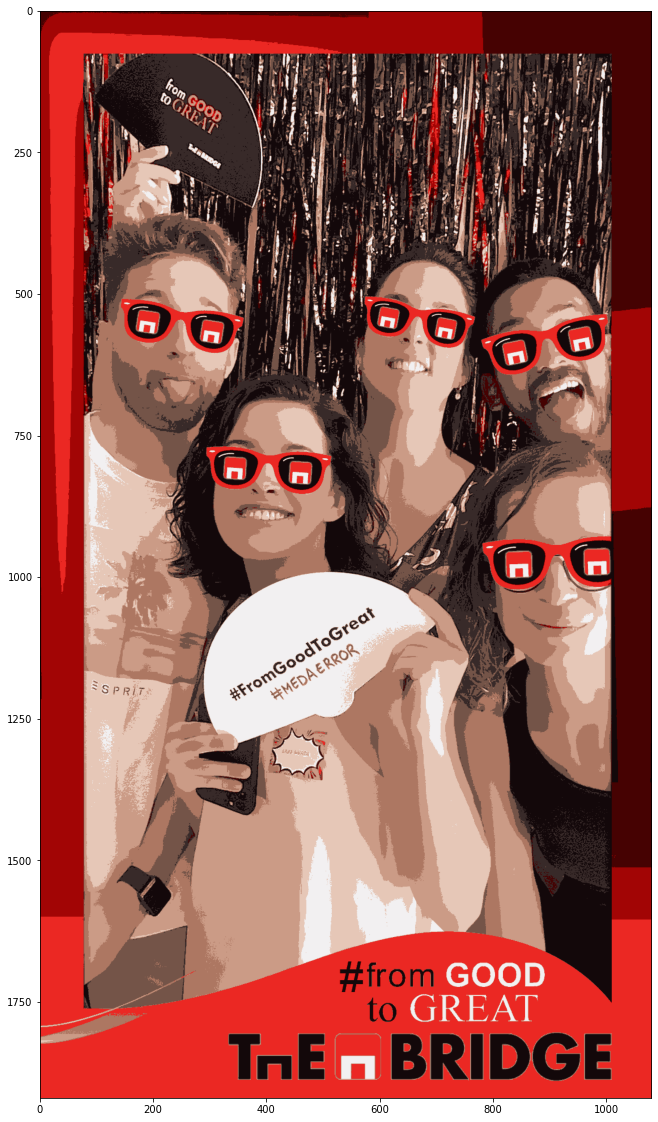

In [36]:
cluster_colors('data/fgtg_2.jpg')

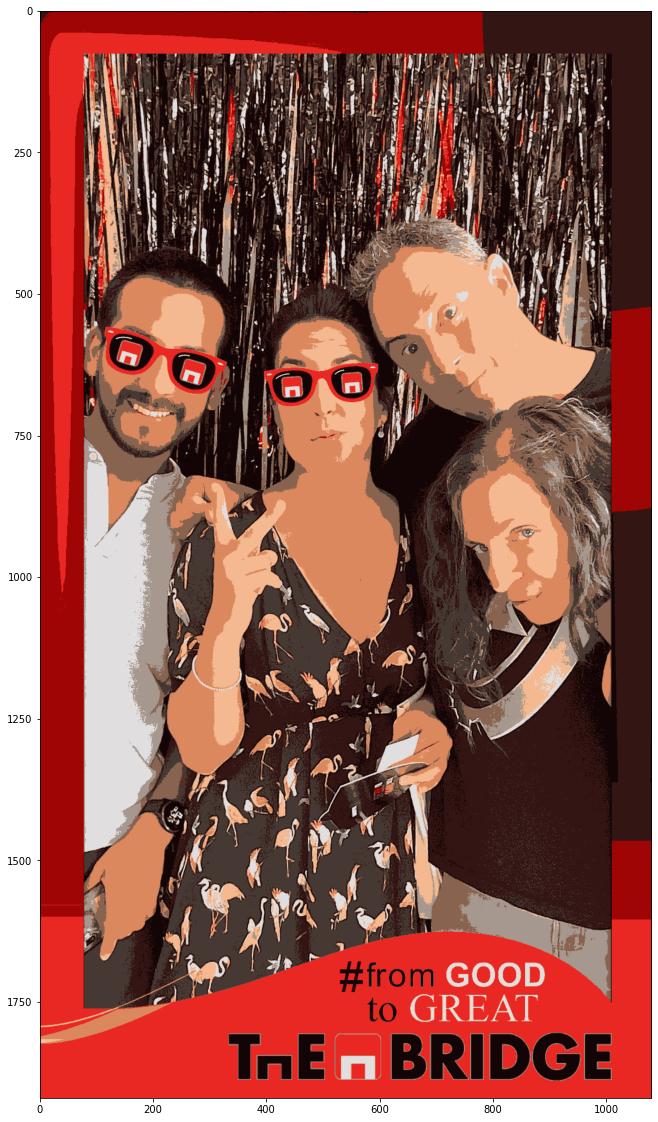

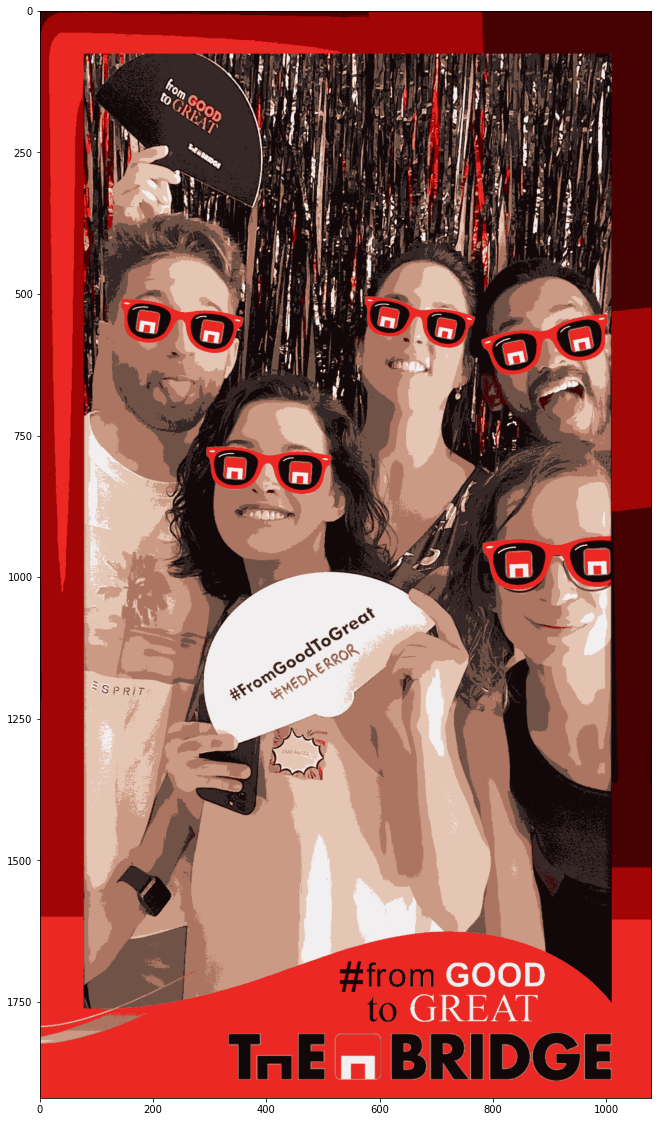

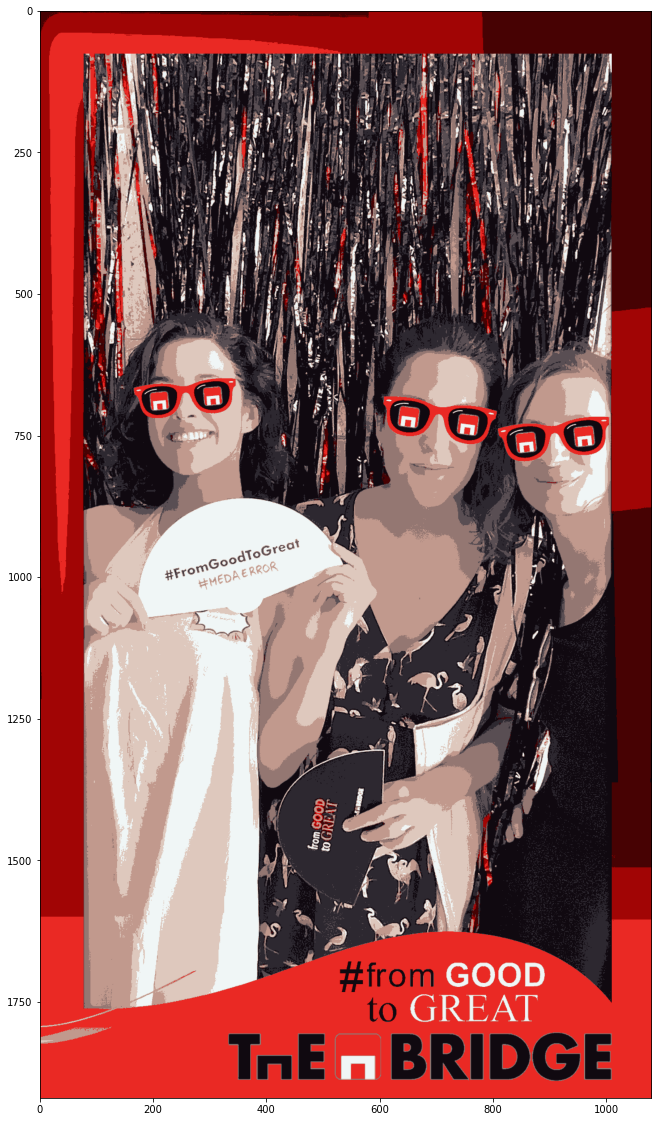

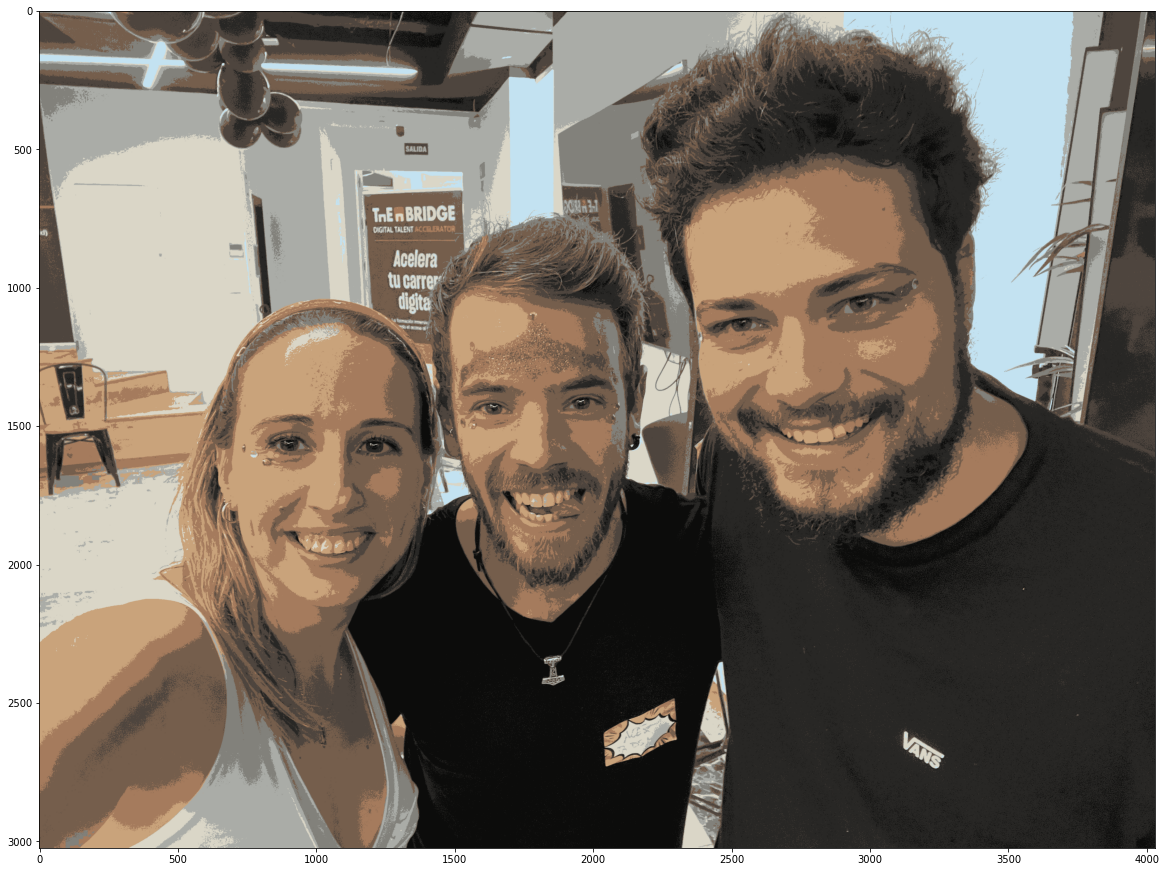

In [38]:
images = ['data/fgtg_1.jpg', 'data/fgtg_2.jpg', 'data/fgtg_3.jpg', 'data/fgtg_4.jpg']

for image in images:
    cluster_colors(image)

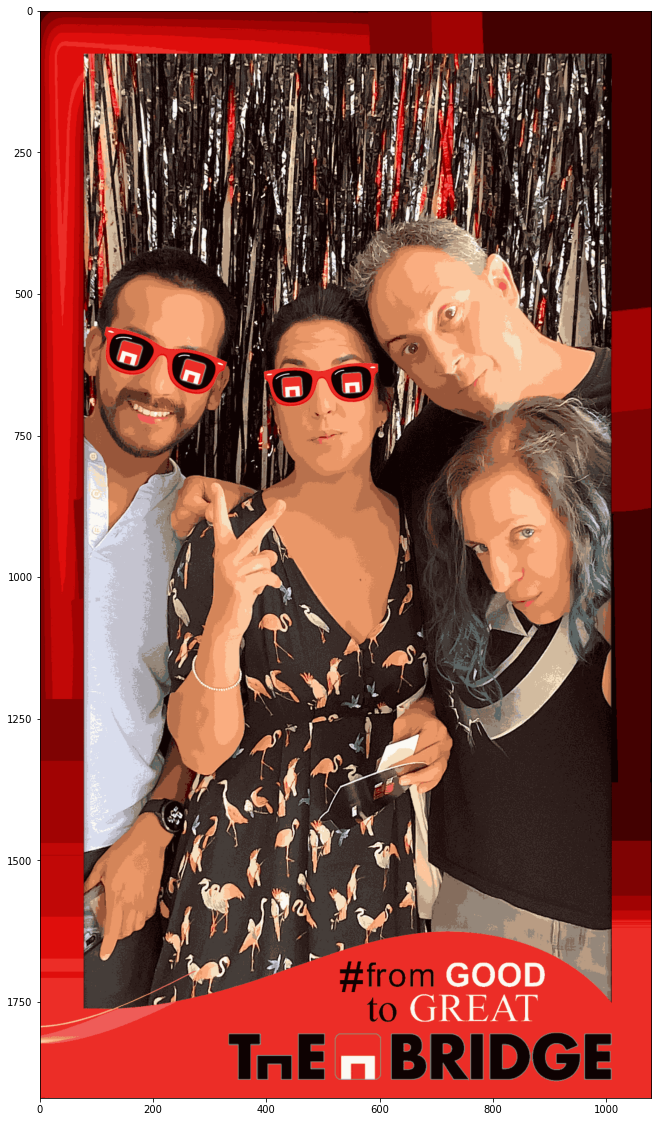

In [39]:
cluster_colors(images[0], 30)